# Traffic Sign Classification Project (Deep Learning)


In [2]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle as pl
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from PIL import Image
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, Dense, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.models import model_from_json


In [3]:
#define paths to overall folder, train folder & test folder
folder_path ='/Users/anasafzal/Dropbox/Data Science/Data Science Projects/Traffic Sign Classification/archive'
train_folder_path = '/Users/anasafzal/Dropbox/Data Science/Data Science Projects/Traffic Sign Classification/archive/Train'
test_folder_path = '/Users/anasafzal/Dropbox/Data Science/Data Science Projects/Traffic Sign Classification/archive/Test'

In [4]:
#check the number of classes in the data
total_classes = len(os.listdir(train_folder_path))
total_classes

43

In [5]:
# Investigating the 43 classes through visualisation of files in meta 
from matplotlib.image import imread

meta_folder = os.path.join(folder_path + '/Meta')
data_images = os.listdir(meta_folder)
# data_images

['8.png',
 '.~lock.ClassesInformation.ods#',
 '9.png',
 '14.png',
 '28.png',
 '29.png',
 '15.png',
 '17.png',
 '16.png',
 '12.png',
 '13.png',
 '39.png',
 '11.png',
 '10.png',
 '38.png',
 '35.png',
 '21.png',
 '20.png',
 '34.png',
 '.~lock.ClassesInformationStrong.ods#',
 '22.png',
 '36.png',
 '37.png',
 '23.png',
 '27.png',
 '33.png',
 '32.png',
 '26.png',
 '18.png',
 '30.png',
 '24.png',
 '25.png',
 '31.png',
 '19.png',
 '4.png',
 '42.png',
 '5.png',
 '41.png',
 '7.png',
 '6.png',
 '40.png',
 '2.png',
 '3.png',
 '1.png',
 '0.png']

In [6]:
cleaned_data_images = np.array([i for i in data_images if not i.startswith('.~lock')]).astype(object)

In [7]:
cleaned_data_images

array(['8.png', '9.png', '14.png', '28.png', '29.png', '15.png', '17.png',
       '16.png', '12.png', '13.png', '39.png', '11.png', '10.png',
       '38.png', '35.png', '21.png', '20.png', '34.png', '22.png',
       '36.png', '37.png', '23.png', '27.png', '33.png', '32.png',
       '26.png', '18.png', '30.png', '24.png', '25.png', '31.png',
       '19.png', '4.png', '42.png', '5.png', '41.png', '7.png', '6.png',
       '40.png', '2.png', '3.png', '1.png', '0.png'], dtype=object)

In [24]:
cleaned_data_images[0]

'8.png'

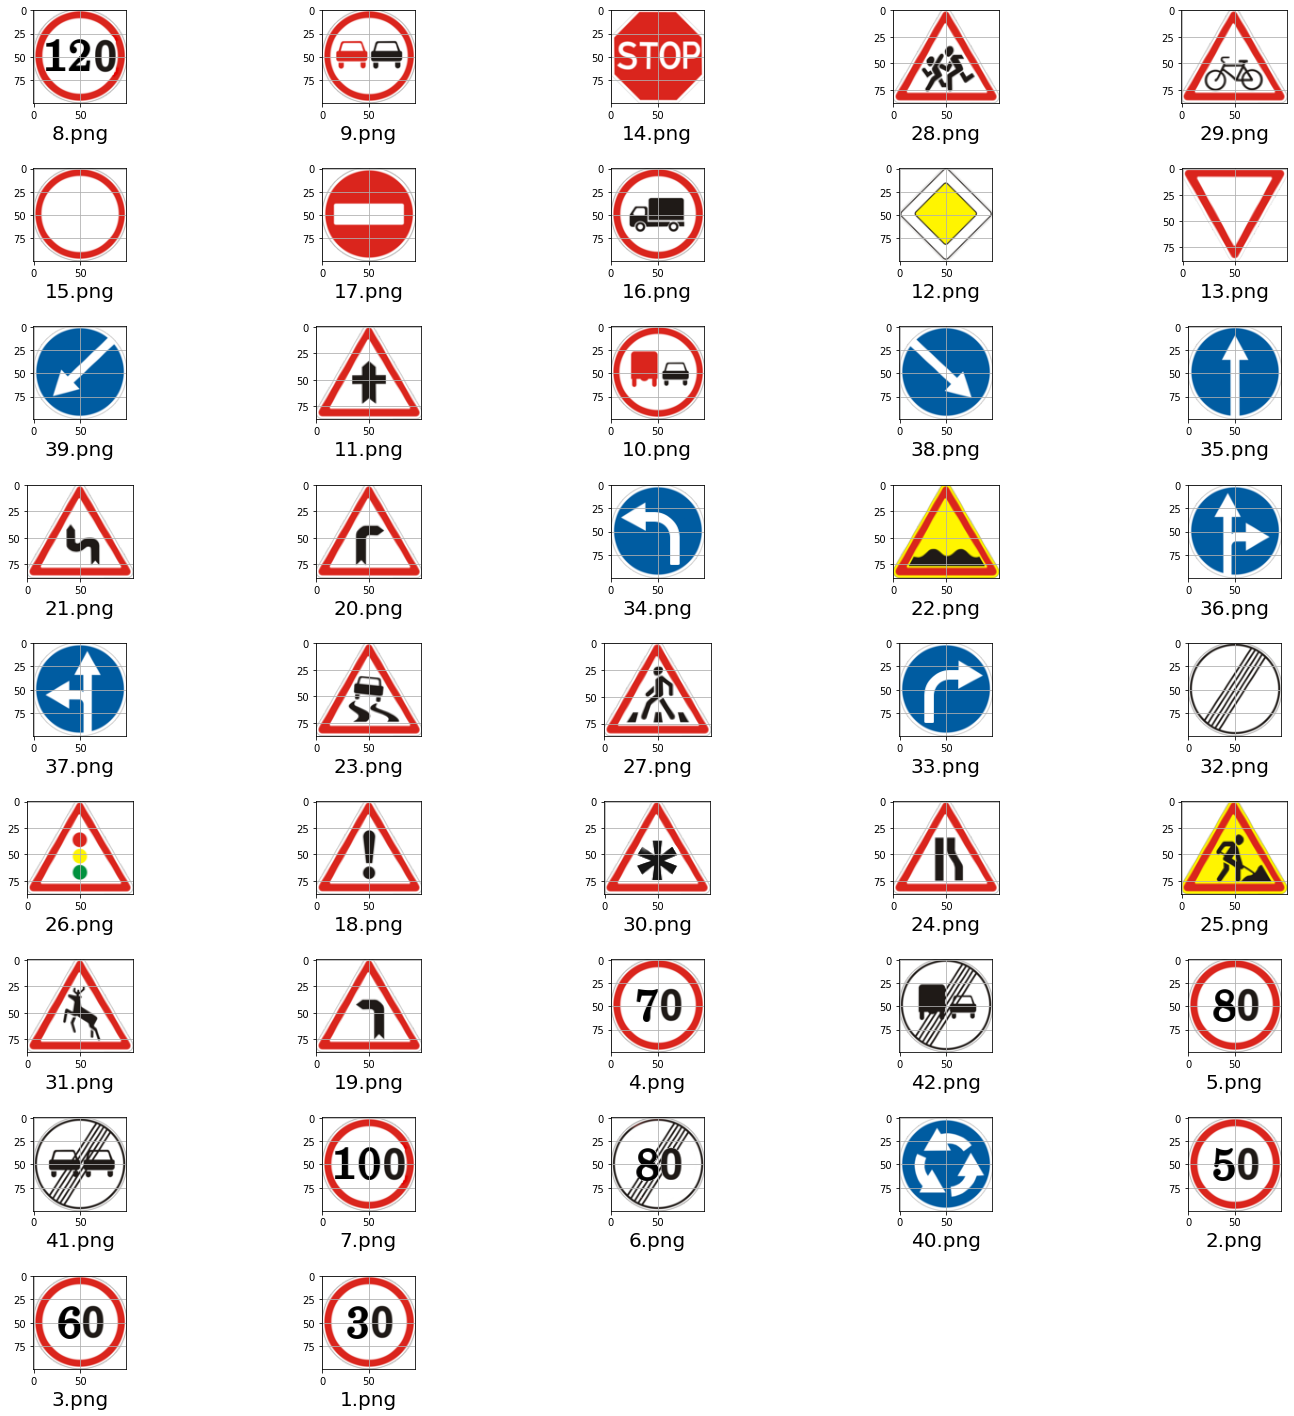

In [31]:
plt.figure(figsize=(25,25))
for i in range(0,42):
    if i+1 < 43:
        plt.subplot(9,5,i+1)
        img = imread(meta_folder + '/' + cleaned_data_images[i])
        plt.imshow(img)
        plt.grid(b=None)
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None , hspace=0.7)
        plt.xlabel(cleaned_data_images[i], fontsize = 20)#width of image
        


In [32]:
# Label Overview
classes = { 0:'Maximum Speed: 20kmph',
            1:'Maximum Speed: 30kmph', 
            2:'Maximum Speed: 50kmph', 
            3:'Maximum Speed: 60kmph', 
            4:'Maximum Speed: 70kmph', 
            5:'Maximum Speed: 80kmph', 
            6:'End of 80kmph zone', 
            7:'Maximum Speed: 100kmph', 
            8:'Maximum Speed: 120kmph', 
            9:'No Overtaking', 
            10:'No overtaking for vehicles over 3.5t', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Vehicles over 3.5 tonnes prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End of all restrictions', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'No left turn', 
            37:'No right turn', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no overtaking', 
            42:'End no overtaking for vehicles > 3.5 tonnes' }

In [62]:
#time to understand the class distribution in the training data, i.e. how many instances per class do we have in the training data

train_folder_dir = os.listdir(train_folder_path)


number_of_inst = []
class_labels = []

for num in train_folder_dir:
    train_files = os.listdir(train_folder_path + '/' + num)
    number_of_inst.append(len(train_files))
    class_labels.append(classes[int(num)])

In [63]:
print(number_of_inst, class_labels)

[240, 1200, 420, 689, 360, 1200, 240, 1470, 210, 1320, 1440, 270, 420, 240, 420, 540, 1110, 2220, 2010, 210, 600, 1410, 330, 2070, 390, 780, 450, 210, 300, 240, 270, 510, 1980, 630, 1410, 2100, 360, 2250, 2160, 1860, 780, 390, 1500] ['End of all restrictions', 'Ahead only', 'Turn left ahead', 'Turn right ahead', 'Dangerous curve right', 'General caution', 'Pedestrians', 'No Overtaking', 'Maximum Speed: 20kmph', 'Right-of-way at intersection', 'Maximum Speed: 100kmph', 'Bicycles crossing', 'Vehicles over 3.5 tonnes prohibited', 'End no overtaking for vehicles > 3.5 tonnes', 'End of 80kmph zone', 'Children crossing', 'No entry', 'Maximum Speed: 30kmph', 'No overtaking for vehicles over 3.5t', 'Dangerous curve left', 'Traffic signals', 'Maximum Speed: 120kmph', 'Double curve', 'Keep right', 'No left turn', 'Wild animals crossing', 'Beware of ice/snow', 'No right turn', 'Keep left', 'End of no overtaking', 'Road narrows on the right', 'Slippery road', 'Maximum Speed: 70kmph', 'No vehicles'

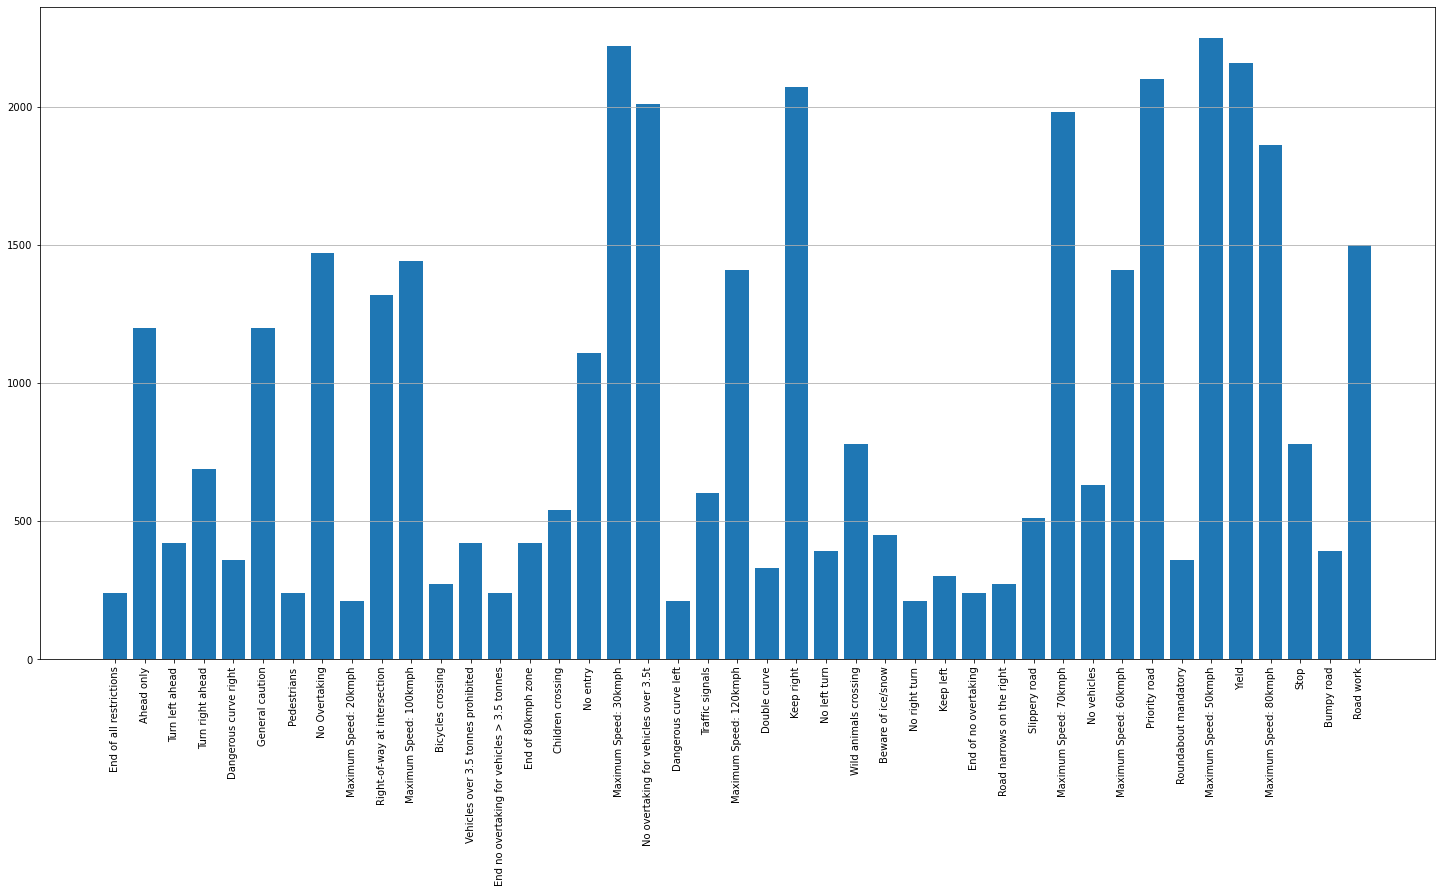

In [166]:
#plot the distribution
plt.figure(figsize=(25,12))  
plt.bar(class_labels, number_of_inst)
plt.xticks(class_labels, rotation='vertical')
plt.grid(b=True, which='major', axis='y')
plt.show()

In [151]:
total_num_classes = 43

all_image_data = []

all_image_classes = []


for i in range(total_num_classes):
    path = os.path.join(train_folder_path, str(i))
    images = os.listdir(path)
    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((30, 30))
            all_image_data.append(np.array(resize_image))
            all_image_classes.append(i)
        except:
            print("Error Can't load image:  " + img)


all_image_data = np.array(all_image_data)
all_image_classes = np.array(all_image_classes)



In [152]:
print(all_image_data.shape, all_image_classes.shape)

(39209, 30, 30, 3) (39209,)


In [153]:
X_train, X_test, y_train, y_test = train_test_split(all_image_data, all_image_classes, test_size=0.3, random_state=42, shuffle=True)


In [154]:
#Normlise the image data to avoid the possibility of exploding gradients because of the high range of the pixels [0, 255]
X_train_norm = X_train / 255
X_test_norm= X_test / 255

print(X_train_norm.shape, X_test_norm.shape, y_train.shape, y_test.shape)

(27446, 30, 30, 3) (11763, 30, 30, 3) (27446,) (11763,)


In [155]:
#Transform class vectors (integers) data into binary matrix for accurate analysis 
y_train_transformed = to_categorical(y_train,43)
y_test_transformed = to_categorical(y_test,43)
print(X_train_norm.shape, X_test_norm.shape, y_train_transformed.shape, y_test_transformed.shape)

(27446, 30, 30, 3) (11763, 30, 30, 3) (27446, 43) (11763, 43)


In [157]:
#Build model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))

In [158]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [159]:
#Because of class bias in the training data, lets add some Data Augmentation to eliminate this bias
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

In [205]:
history = model.fit(aug.flow(X_train_norm, y_train_transformed, batch_size=32), epochs=30, validation_data=(X_test_norm, y_test_transformed))

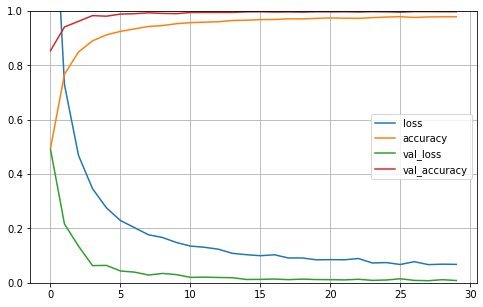

In [162]:
#plot the performance 
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [163]:
#getting the image data from the test.csv file to test the model prediction
test_data_file = pd.read_csv(folder_path + '/Test.csv')

test_class_labels = test_data_file["ClassId"].values
test_imgs = test_data_file["Path"].values

test_img_data =[]

for img in test_imgs:
    try:
        image = cv2.imread(folder_path + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((30, 30))
        test_img_data.append(np.array(resize_image))
    except:
        print("Error in " + img)


In [164]:
#preprocess the test image data
test_file_X_test = np.array(test_img_data)
test_file_X_test_norm = test_file_X_test/255


In [169]:
#Can finally use the model to try and predict using the test data!
pred = model.predict_classes(test_file_X_test_norm)

#Accuracy with the test data
print('Model Accuracy on Test Data: ',accuracy_score(test_class_labels, pred))

Model Accuracy on Test Data:  0.9510688836104513


In [170]:
from sklearn.metrics import classification_report

print(classification_report(test_class_labels, pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        60
           1       0.89      1.00      0.94       720
           2       0.97      0.91      0.94       750
           3       0.91      0.96      0.94       450
           4       0.98      0.94      0.96       660
           5       0.92      0.95      0.93       630
           6       0.93      0.87      0.90       150
           7       0.96      0.90      0.93       450
           8       0.96      0.91      0.94       450
           9       0.99      0.99      0.99       480
          10       0.99      1.00      0.99       660
          11       0.95      1.00      0.97       420
          12       1.00      0.93      0.96       690
          13       0.95      1.00      0.97       720
          14       0.93      1.00      0.96       270
          15       1.00      1.00      1.00       210
          16       0.99      0.99      0.99       150
          17       1.00    

In [175]:
classes.get(12)

'Priority road'

In [178]:
%matplotlib inline

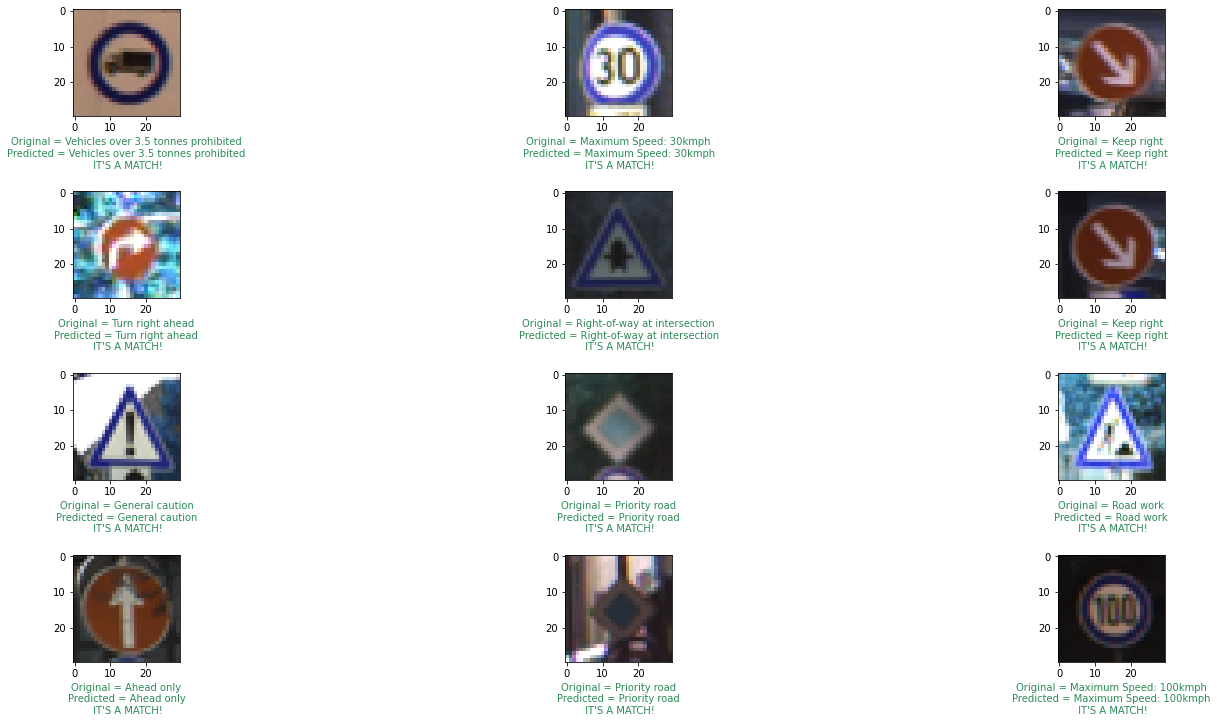

In [204]:
#Using our CNN to Identify Traffic Signs
plt.figure(figsize=(25,12))  
for i in range(12):
    plt.subplot(4, 3, i + 1)
    original = test_class_labels[0 + i]
    predicted = pred[0 + i]
    colour = 'seagreen'
    statement = " IT'S A MATCH!"
    if predicted != original:
        colour = 'red'
        statement = "incorrect match"
    plt.xlabel('Original = {}'.format(classes.get(original))+ '\n'+'Predicted = {}'.format(classes.get(predicted))+'\n' +statement, color = colour)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None , hspace=0.7)
    plt.imshow(test_file_X_test_norm[0 + i])
plt.show()
    

In [211]:
model.save('my_model.h5')

In [212]:
model_json = model.to_json()
with open('model.json','w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5')